In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('insurance.csv')

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# DATA CLEANING

In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Feature Engineering

In [7]:
Male=pd.get_dummies(df['sex'],drop_first=True)
df=pd.concat([df,Male],axis=1)
df.head()
    

,age,sex,bmi,children,smoker,region,charges,male
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1


In [8]:
Smokeyes=pd.get_dummies(df['smoker'],drop_first=True)
df=pd.concat([df,Smokeyes],axis=1)
df.head()
    

,age,sex,bmi,children,smoker,region,charges,male,yes
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [9]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [10]:
Region=pd.get_dummies(df['region'],drop_first=True)
df=pd.concat([df,Region],axis=1)
df.head()
    

,age,sex,bmi,children,smoker,region,charges,male,yes,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1,0,0


In [11]:
df.rename(columns={'yes':'Smoker'})

,age,sex,bmi,children,smoker,region,charges,male,Smoker,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0,1,0,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0,1,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0,0,1


# Exploratory Analysis

### Distribution of 'sex' column

<AxesSubplot:xlabel='sex', ylabel='count'>

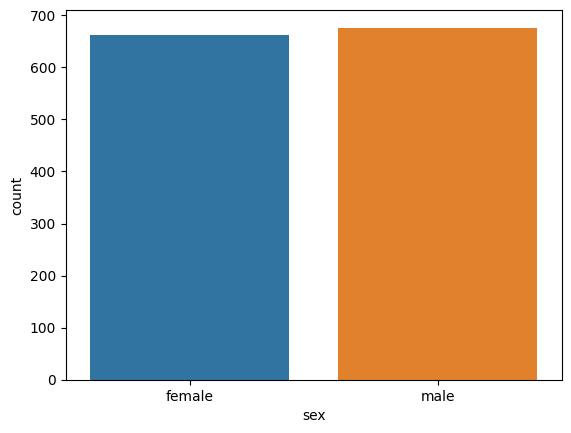

In [12]:
sns.countplot(x='sex',data=df)

In [13]:
df.groupby('sex').size()

sex
female    662
male      676
dtype: int64

### Relationship of Smoking and gender wrt Charges

C:\Users\Rizwal\AppData\Local\Temp\ipykernel_8180\84529830.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('smoker').mean()['charges'].plot(kind='bar')


<AxesSubplot:xlabel='smoker'>

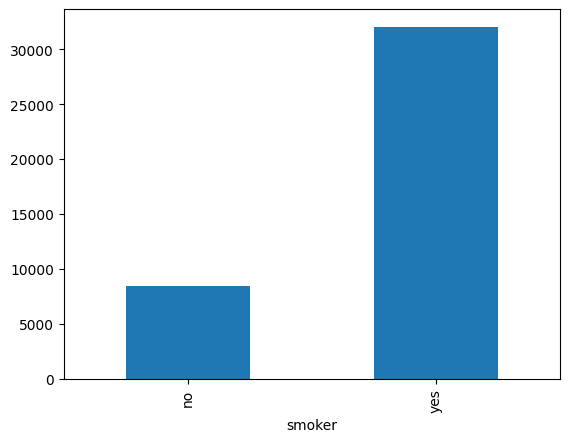

In [14]:
df.groupby('smoker').mean()['charges'].plot(kind='bar')

<AxesSubplot:xlabel='sex', ylabel='charges'>

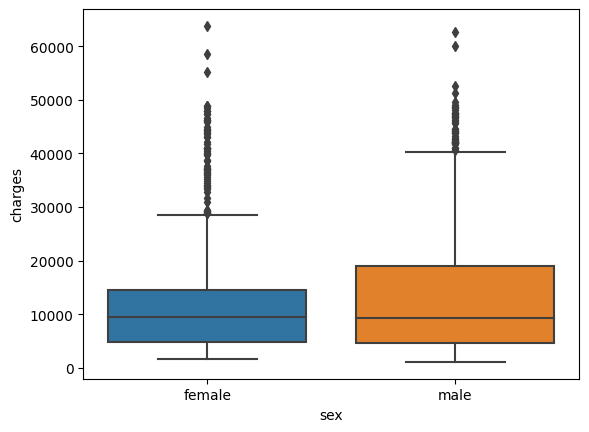

In [15]:
sns.boxplot(x="sex",y="charges",data=df)

<AxesSubplot:xlabel='sex', ylabel='charges'>

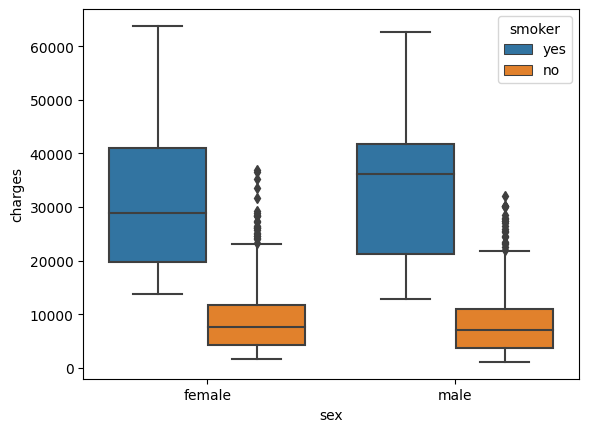

In [16]:
sns.boxplot(x="sex",y="charges",data=df,hue='smoker')

### Distribution of 'age' column

<AxesSubplot:xlabel='age', ylabel='charges'>

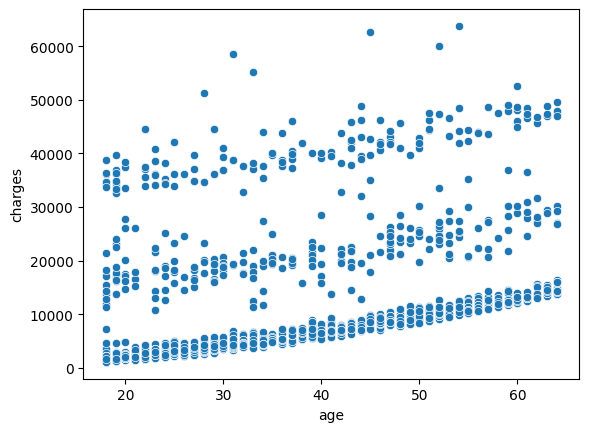

In [17]:
sns.scatterplot(x="age",y="charges",data=df)

<AxesSubplot:xlabel='age', ylabel='charges'>

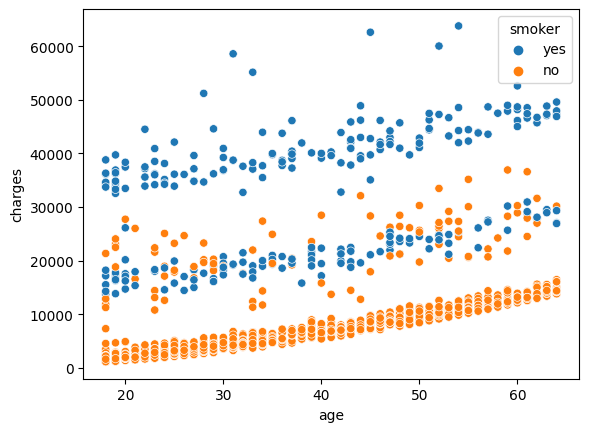

In [18]:
sns.scatterplot(x="age",y="charges",data=df,hue='smoker')

### Distribution of 'bmi' column

In [19]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,yes,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1,0,0


<AxesSubplot:xlabel='bmi', ylabel='charges'>

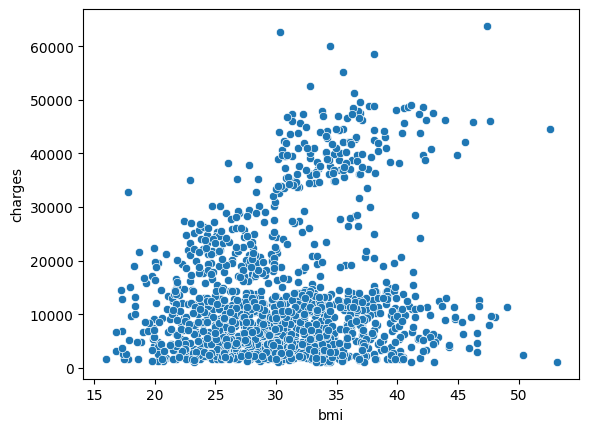

In [20]:
sns.scatterplot(x='bmi',y='charges',data=df)

<AxesSubplot:xlabel='bmi', ylabel='charges'>

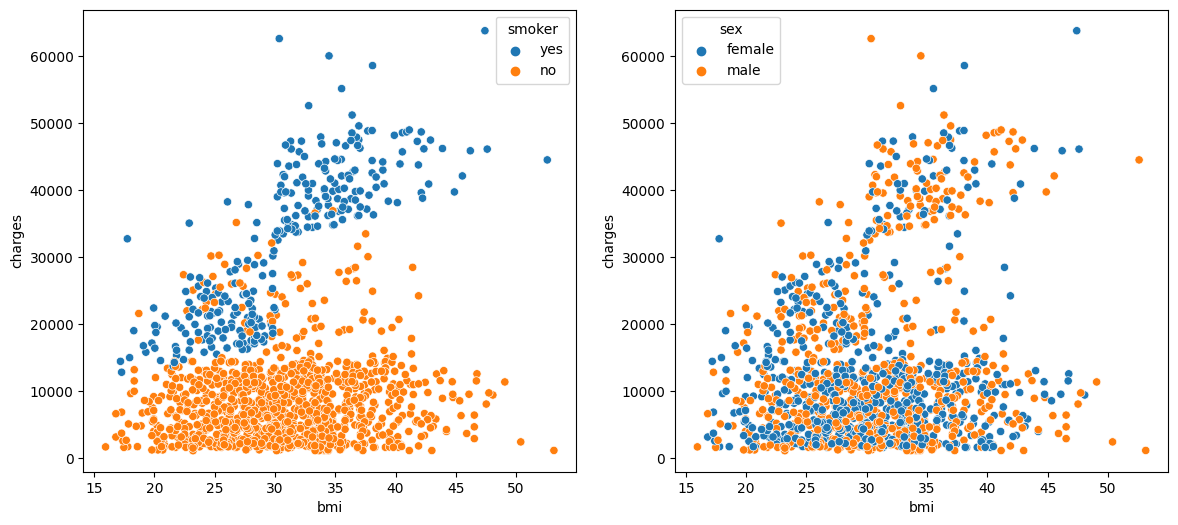

In [21]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(14,6))
sns.scatterplot(x='bmi',y='charges',data=df,hue='smoker',ax=ax[0])
sns.scatterplot(x='bmi',y='charges',data=df,hue='sex',ax=ax[1])

In [22]:
df.drop(['sex','smoker','region'],axis=1,inplace=True)

In [26]:
df=df.rename(columns={'yes':'Smoker'})

In [27]:
df

,age,bmi,children,charges,male,Smoker,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


<AxesSubplot:>

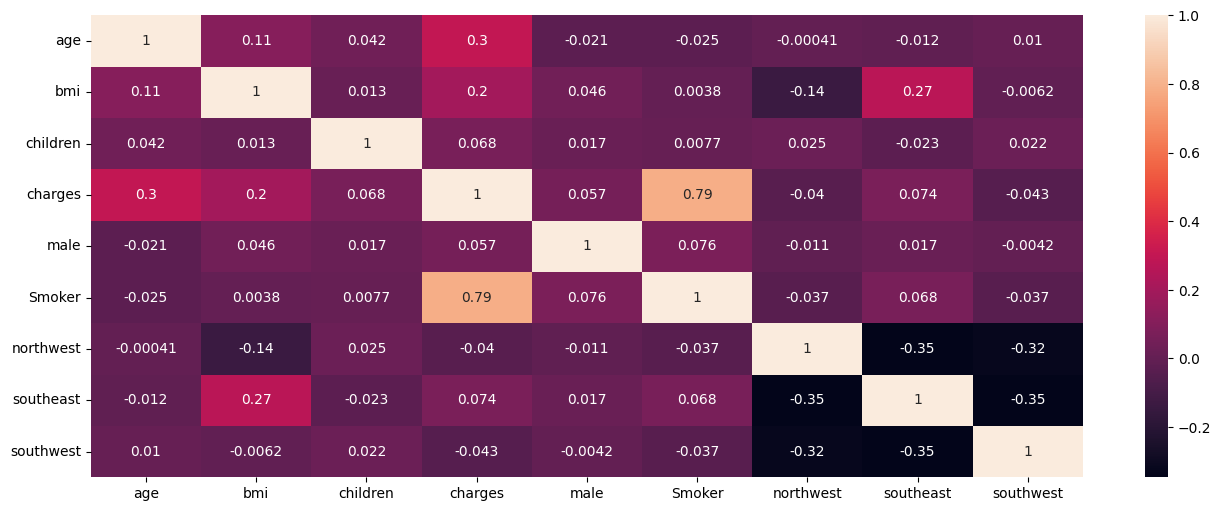

In [33]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(),annot=True)

### Splitting up the data

In [34]:
x=df.drop(['charges'],axis=1)
y=df['charges']

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)

In [38]:
 x_train.shape

(802, 8)

In [39]:
x_test.shape

(536, 8)

In [41]:
y_train.shape

(802,)

In [42]:
y_test.shape

(536,)

## Scaling the data

In [43]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [46]:
scaled_x_train=scaler.fit_transform(x_train)
scaled_x_test=scaler.transform(x_test)

# Support Vector Machine Model

In [50]:
from sklearn.svm import SVR

regressor=SVR()
regressor.fit(scaled_x_train,y_train)

SVR()

In [51]:
predict=regressor.predict(scaled_x_test)

In [53]:
predict.shape

(536,)

In [54]:
predict[:10]

array([9582.60733878, 9605.2239552 , 9562.88778347, 9552.44064181,
       9573.7652745 , 9537.16708734, 9510.1884983 , 9519.64608383,
       9517.47536617, 9532.75376438])

In [55]:
y_test[:10]

C:\Users\Rizwal\AppData\Local\Temp\ipykernel_8180\2588316582.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test[:10]


587     43943.87610
381     42303.69215
216     10355.64100
310      8444.47400
131     13616.35860
372      7639.41745
482      1622.18850
952      4527.18295
631      1977.81500
1143     6338.07560
Name: charges, dtype: float64